In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_train = '/content/drive/MyDrive/fgabinar_dataset/titanic_data_train.csv'
data_test = '/content/drive/MyDrive/fgabinar_dataset/titanic_data_test.csv'

In [5]:
df_train = pd.read_csv(data_train)
df_test = pd.read_csv(data_test)

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## EDA

In [10]:
print(df_train["Survived"].value_counts())
print(df_train["Sex"].value_counts())
print(df_train["Age"].value_counts())

0    549
1    342
Name: Survived, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


0    549
1    342
Name: Survived, dtype: int64
 


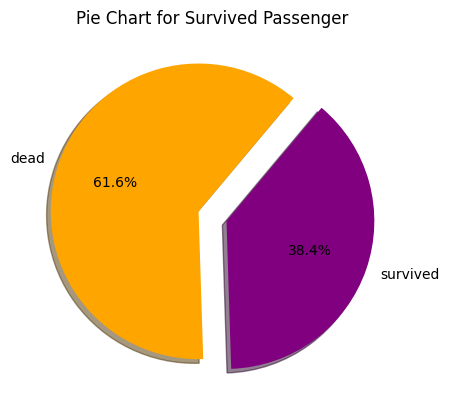

In [11]:
#pie chart for analyze the data survived
print(df_train.Survived.value_counts())
print(" ")

mydata = df_train['Survived'].value_counts()
myexplode = (0.1 , 0.1)
mylabels = ['dead', 'survived']
mycolors = ['orange', 'purple']
plt.pie(mydata, explode=myexplode, labels=mylabels, colors=mycolors, autopct='%1.1f%%', startangle=50, shadow=True)
plt.title('Pie Chart for Survived Passenger')
plt.show()

In [12]:
#calculate survived vs sex
survived_data = pd.crosstab(df_train["Survived"], df_train["Sex"])
survived_data['Percentage'] = survived_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(survived_data)

Sex       female  male  Percentage
Survived                          
0             81   468   85.245902
1            233   109   31.871345


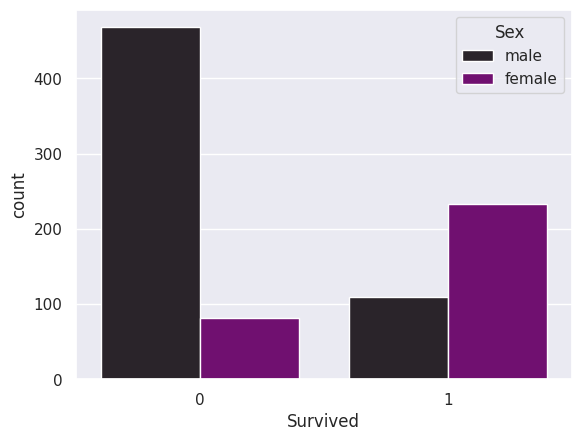

In [13]:
sns.set(style = "darkgrid")
ax = sns.countplot(x="Survived", hue="Sex", data=df_train, palette='dark:purple')
plt.show()

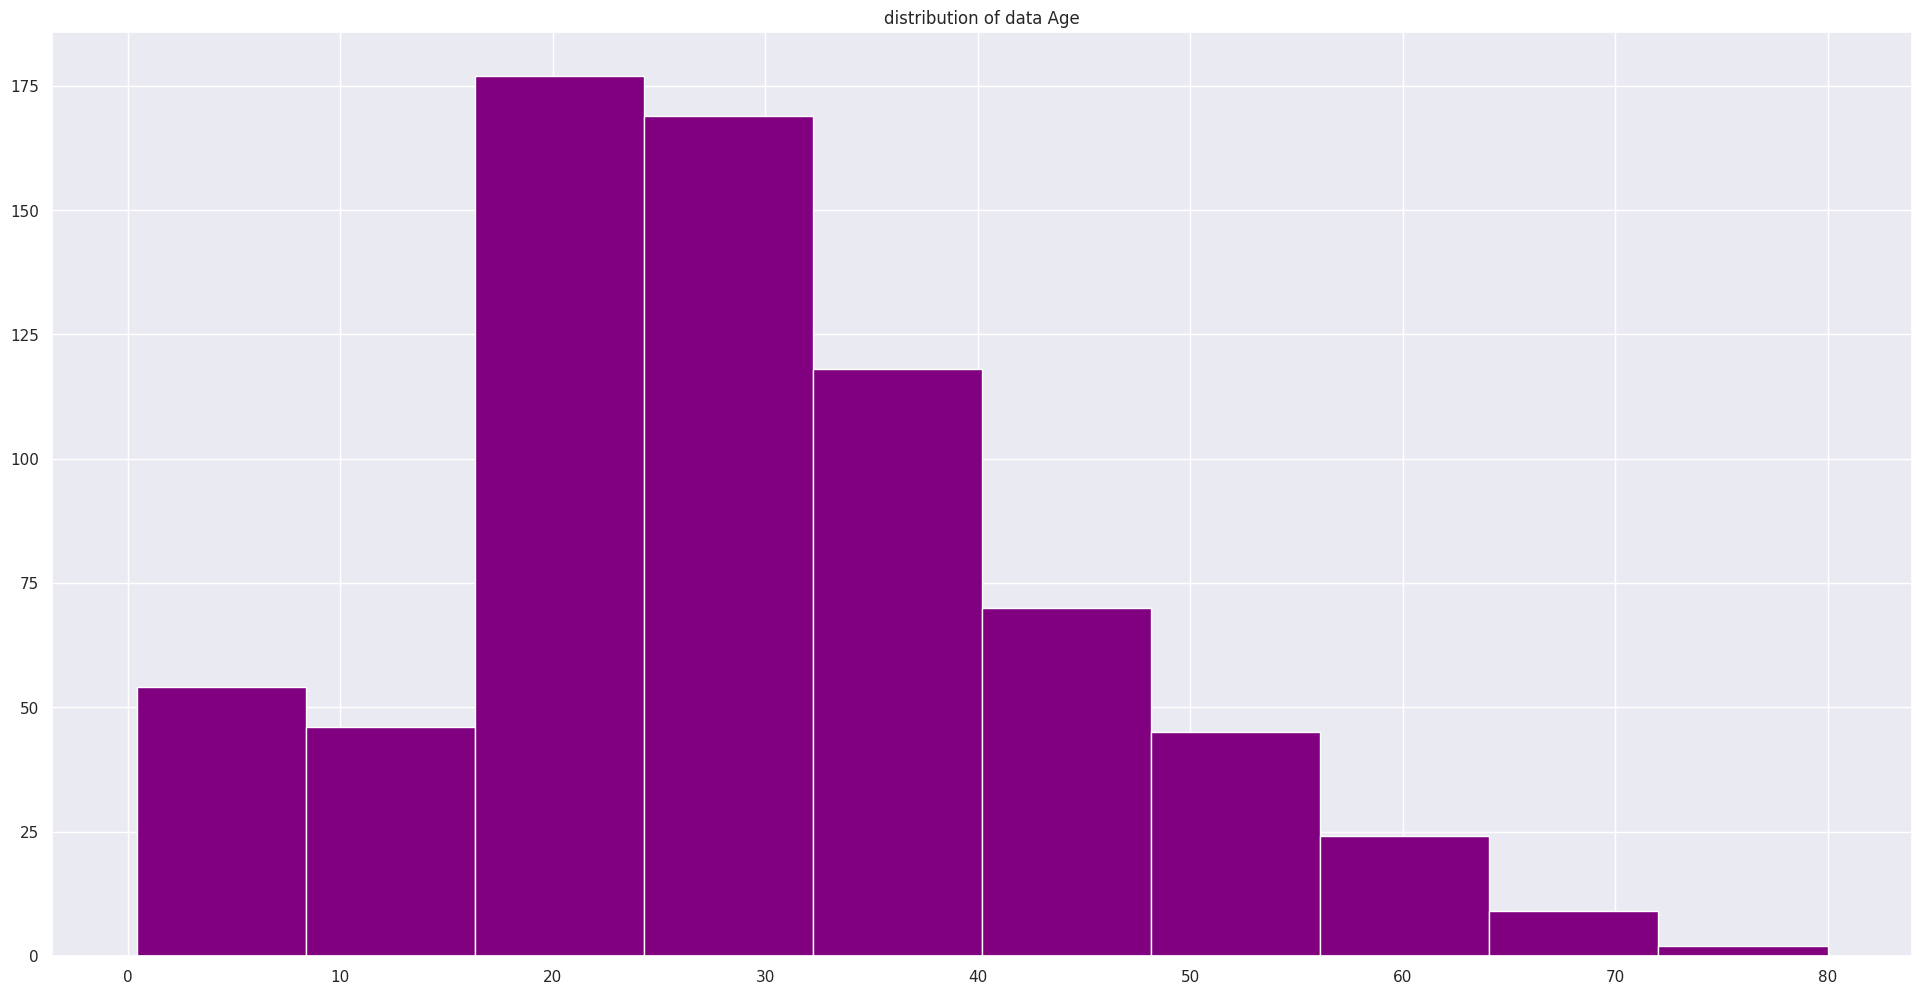

In [14]:
#Age Distribution
df_train[['Age']].hist(bins=10, figsize=(24,12), color='purple')
plt.title('distribution of data Age')
plt.show()

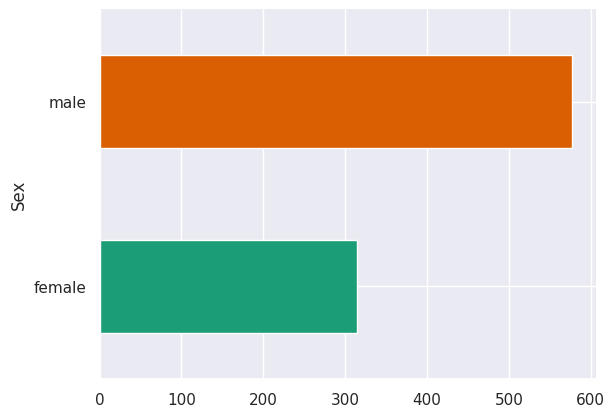

In [15]:
#Sex Distribution
from matplotlib import pyplot as plt
import seaborn as sns
df_train.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

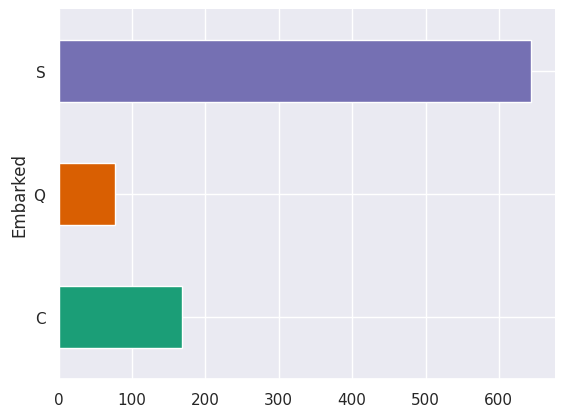

In [16]:
#Embarked
from matplotlib import pyplot as plt
import seaborn as sns
df_train.groupby('Embarked').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##Preprocessing Data Train

In [17]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
df_train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
#checking missing value data train
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
# fill the missing value in the data train
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].median())
df_train["Cabin"] = df_train["Cabin"].fillna("Others")
df_train["Embarked"] = df_train["Embarked"].fillna("Others")

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
df_train.duplicated().sum()

0

In [24]:
#encoding data train
from sklearn.preprocessing import LabelEncoder

In [25]:
numerical_data = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
categorical_data = ["Survived", "Ticket", "Cabin", "Embarked", "Sex"]
for col in categorical_data:
  encoder = LabelEncoder()
  df_train[col] = encoder.fit_transform(df_train[col])

In [26]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,146,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,146,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,55,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,146,3


In [27]:
#dropping the 'name' column in data train as it has nothing to do with survived (target variable)
df_train = df_train.drop(['Name'], axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,523,7.2500,146,3
1,2,1,1,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,0,26.0,0,0,669,7.9250,146,3
3,4,1,1,0,35.0,1,0,49,53.1000,55,3
4,5,0,3,1,35.0,0,0,472,8.0500,146,3


In [28]:
#handling outliers data train
print(f'jumlah baris sebelum memfilter outlier: {len(df_train)}')
filtered_entries = np.array([True] * len(df_train))
for col in numerical_data:
       Q1 = df_train[col].quantile(0.25)
       Q3 = df_train[col].quantile(0.75)
       IQR = Q3 - Q1
       low_limit = Q1 - (IQR * 1.5)
       high_limit = Q3 + (IQR * 1.5)
       filtered_entries = ((df_train[col] >= low_limit) & (df_train[col] <= high_limit)) &filtered_entries

df_train = df_train[filtered_entries]

print(f'jumlah baris setelah memfilter outlier: {len(df_train)}')

jumlah baris sebelum memfilter outlier: 891
jumlah baris setelah memfilter outlier: 577


In [29]:
#Normalization data train
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
x = df_train.values #returns a numpy array
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled)
print(normalized_df)

           0    1    2    3         4    5    6         7         8   \
0    0.000000  0.0  1.0  1.0  0.346939  0.5  0.0  0.769572  0.118512   
1    0.002247  1.0  1.0  0.0  0.428571  0.0  0.0  0.985229  0.129546   
2    0.003371  1.0  0.0  0.0  0.612245  0.5  0.0  0.069424  0.868002   
3    0.004494  0.0  1.0  1.0  0.612245  0.0  0.0  0.694239  0.131590   
4    0.005618  0.0  1.0  1.0  0.469388  0.0  0.0  0.403250  0.138264   
..        ...  ...  ...  ...       ...  ...  ...       ...       ...   
572  0.993258  0.0  1.0  1.0  0.408163  0.0  0.0  0.957164  0.115243   
573  0.995506  0.0  0.5  1.0  0.448980  0.0  0.0  0.146233  0.212505   
574  0.996629  1.0  0.0  0.0  0.285714  0.0  0.0  0.017725  0.490396   
575  0.998876  1.0  0.0  1.0  0.428571  0.0  0.0  0.008863  0.490396   
576  1.000000  0.0  1.0  1.0  0.551020  0.0  0.0  0.685377  0.126686   

           9         10  
0    0.993197  1.000000  
1    0.993197  1.000000  
2    0.374150  1.000000  
3    0.993197  1.000000  
4    

##Train-test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x = df_train.drop(['Survived'], axis = 1)
y = df_train['Survived']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

In [33]:
x_train.shape, x_test.shape

((403, 10), (174, 10))

## Classification Model

**Compare four algorithms to choose who has the best model for predicting survived passenger**

In [34]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [35]:
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)

In [36]:

knn_predict = knn.predict(x_test)
survive_predicted = pd.Series(list(knn_predict))
survive_predicted.value_counts()

0    152
1     22
dtype: int64

In [37]:
print(accuracy_score(y_test, knn_predict))

0.6724137931034483


In [38]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.68      0.92      0.78       113
           1       0.59      0.21      0.31        61

    accuracy                           0.67       174
   macro avg       0.64      0.57      0.55       174
weighted avg       0.65      0.67      0.62       174



In [39]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_predict = dtc.predict(x_test)
dtc_predicted = pd.Series(list(dtc_predict))
dtc_predicted.value_counts()

0    123
1     51
dtype: int64

In [40]:
print(accuracy_score(y_test, dtc_predict))

0.7011494252873564


In [41]:
print(classification_report(y_test, dtc_predict))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       113
           1       0.59      0.49      0.54        61

    accuracy                           0.70       174
   macro avg       0.67      0.65      0.66       174
weighted avg       0.69      0.70      0.69       174



In [42]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_predict = nb.predict(x_test)
nb_predicted = pd.Series(list(nb_predict))
nb_predicted.value_counts()

0    115
1     59
dtype: int64

In [43]:
print(accuracy_score(y_test, nb_predict))

0.7701149425287356


In [44]:
print(classification_report(y_test, nb_predict))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       113
           1       0.68      0.66      0.67        61

    accuracy                           0.77       174
   macro avg       0.75      0.74      0.75       174
weighted avg       0.77      0.77      0.77       174



In [45]:
#Support Vector Machine
from sklearn.svm import SVC
svc = SVC(kernel = "linear")
svc.fit(x_train, y_train)
svc_predict = svc.predict(x_test)
svc_predicted = pd.Series(list(svc_predict))
svc_predicted.value_counts()

0    131
1     43
dtype: int64

In [47]:
print(accuracy_score(y_test, svc_predict))

0.7471264367816092


In [46]:
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       113
           1       0.70      0.49      0.58        61

    accuracy                           0.75       174
   macro avg       0.73      0.69      0.70       174
weighted avg       0.74      0.75      0.73       174



## Predict Data Test

In [48]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [49]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [50]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [51]:
df_test.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [52]:
#checking missing value data test
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [53]:
# Fill the missing value in the data test
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].median())
df_test["Cabin"] = df_test["Cabin"].fillna("Others")
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].median())

In [54]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [55]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Others,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Others,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Others,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Others,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Others,S


In [56]:
df_test.duplicated().sum()

0

In [57]:
#Encoding data test
numerical_data = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
categorical_data = ["Ticket", "Cabin", "Embarked", "Sex"]
for col in categorical_data:
  encoder = LabelEncoder()
  df_test[col] = encoder.fit_transform(df_test[col])

In [58]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,152,7.8292,76,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,221,7.0000,76,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,73,9.6875,76,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,147,8.6625,76,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,138,12.2875,76,2


In [59]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    int64  
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    int64  
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 36.0+ KB


In [60]:
#dropping the 'Name' column in data test
df_test = df_test.drop(['Name'], axis=1)
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,152,7.8292,76,1
1,893,3,0,47.0,1,0,221,7.0000,76,2
2,894,2,1,62.0,0,0,73,9.6875,76,1
3,895,3,1,27.0,0,0,147,8.6625,76,2
4,896,3,0,22.0,1,1,138,12.2875,76,2


In [61]:
#handling outliers data test
print(f'jumlah baris sebelum memfilter outlier: {len(df_test)}')
filtered_entries = np.array([True] * len(df_test))
for col in numerical_data:
       Q1 = df_test[col].quantile(0.25)
       Q3 = df_test[col].quantile(0.75)
       IQR = Q3 - Q1
       low_limit = Q1 - (IQR * 1.5)
       high_limit = Q3 + (IQR * 1.5)
       filtered_entries = ((df_test[col] >= low_limit) & (df_test[col] <= high_limit)) &filtered_entries

df_test = df_test[filtered_entries]

print(f'jumlah baris setelah memfilter outlier: {len(df_test)}')

jumlah baris sebelum memfilter outlier: 418
jumlah baris setelah memfilter outlier: 281


In [62]:
#Normalization data test
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
x = df_test.values #returns a numpy array
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled)
print(normalized_df)

            0    1    2         3    4    5         6         7    8    9
0    0.000000  1.0  1.0  0.535714  0.0  0.0  0.419890  0.120449  1.0  0.5
1    0.002404  1.0  0.0  0.833333  0.5  0.0  0.610497  0.107692  1.0  1.0
2    0.007212  1.0  1.0  0.357143  0.0  0.0  0.406077  0.133269  1.0  1.0
3    0.012019  1.0  1.0  0.047619  0.0  0.0  0.720994  0.141923  1.0  1.0
4    0.014423  1.0  0.0  0.428571  0.0  0.0  0.436464  0.117372  1.0  0.5
..        ...  ...  ...       ...  ...  ...       ...       ...  ...  ...
276  0.985577  1.0  0.0  0.357143  0.0  0.0  0.629834  0.119231  1.0  0.5
277  0.990385  1.0  0.0  0.380952  0.0  0.0  0.508287  0.119615  1.0  1.0
278  0.992788  1.0  1.0  0.357143  0.0  0.0  0.737569  0.123846  1.0  1.0
279  0.997596  1.0  1.0  0.630952  0.0  0.0  0.955801  0.111538  1.0  1.0
280  1.000000  1.0  1.0  0.357143  0.0  0.0  0.607735  0.123846  1.0  1.0

[281 rows x 10 columns]


**Predict the data test survive with Naive Bayes Algorithm because it has the best accuracy**

In [63]:
data_test_predict = nb.predict(x_test)

In [64]:
data_test_predict = df_test
df_test['Predicted_Survive'] = nb.predict(data_test_predict)

In [65]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Predicted_Survive
0,892,3,1,34.5,0,0,152,7.8292,76,1,0
1,893,3,0,47.0,1,0,221,7.0000,76,2,1
3,895,3,1,27.0,0,0,147,8.6625,76,2,0
5,897,3,1,14.0,0,0,261,9.2250,76,2,0
6,898,3,0,30.0,0,0,158,7.6292,76,1,1
...,...,...,...,...,...,...,...,...,...,...,...
410,1302,3,0,27.0,0,0,228,7.7500,76,1,1
412,1304,3,0,28.0,0,0,184,7.7750,76,2,1
413,1305,3,1,27.0,0,0,267,8.0500,76,2,0
415,1307,3,1,38.5,0,0,346,7.2500,76,2,0


In [66]:
#Total of passenger who are predicted to survive
predict_survive = data_test_predict['Predicted_Survive'].value_counts()
print(predict_survive)

0    166
1    115
Name: Predicted_Survive, dtype: int64


0    166
1    115
Name: Predicted_Survive, dtype: int64
 


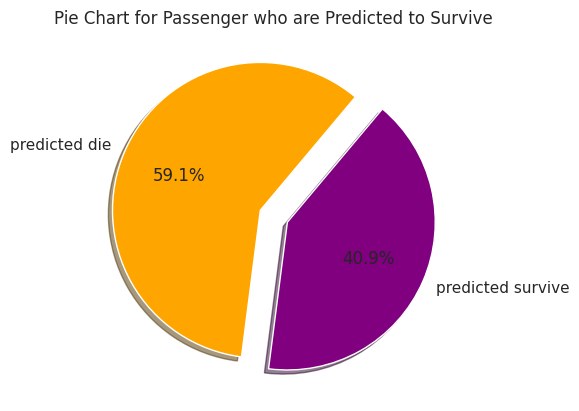

In [67]:
#pie chart for analyze the data of passenger who are predicted to survive
print(data_test_predict.Predicted_Survive.value_counts())
print(" ")

mydata = data_test_predict['Predicted_Survive'].value_counts()
myexplode = (0.1 , 0.1)
mylabels = ['predicted die', 'predicted survive']
mycolors = ['orange', 'purple']
plt.pie(mydata, explode=myexplode, labels=mylabels, colors=mycolors, autopct='%1.1f%%', startangle=50, shadow=True)
plt.title('Pie Chart for Passenger who are Predicted to Survive')
plt.show()